In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
import matplotlib.gridspec as gridspec 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.metrics import roc_curve, auc
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from sklearn.metrics import mean_squared_error

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
df.location= df.location.fillna('')

In [8]:
df_US = df[df['location'].str.contains("US")]
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


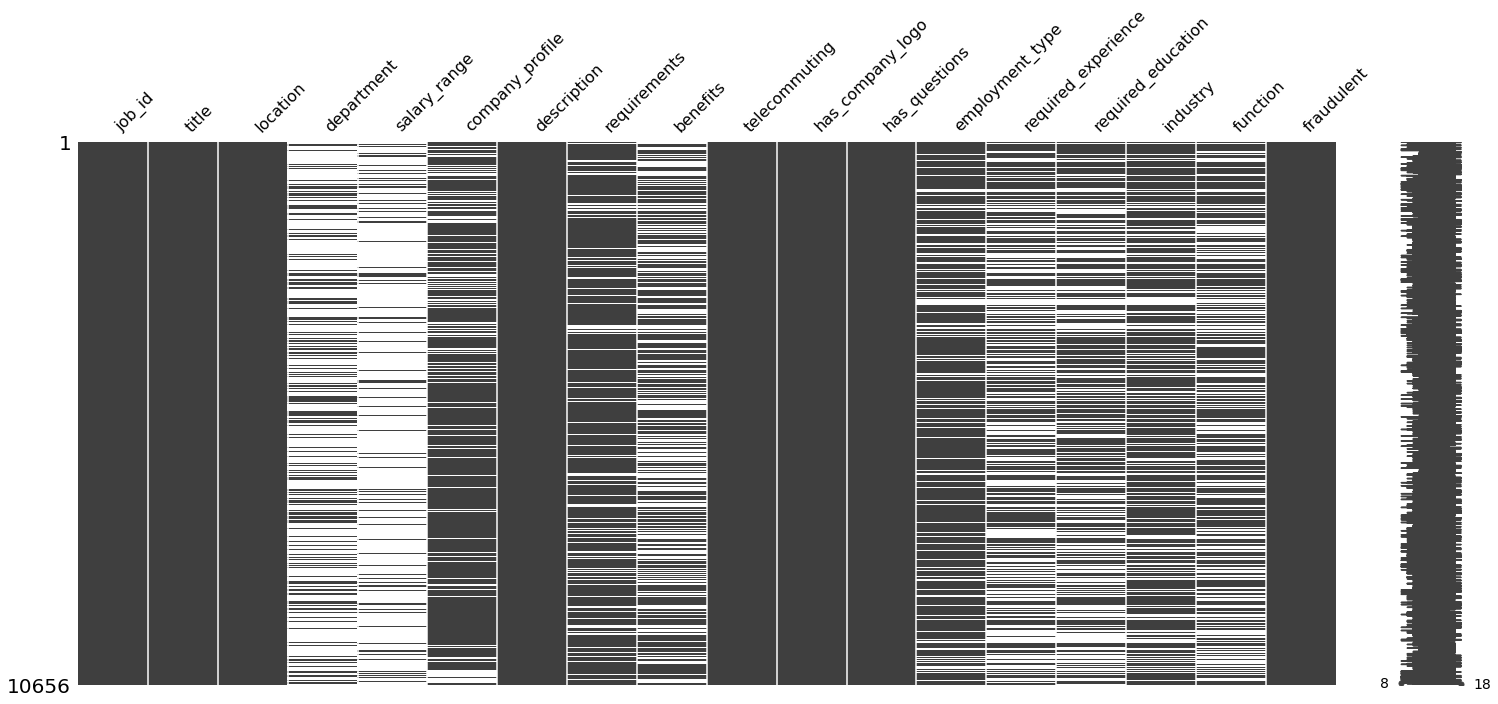

In [9]:
msno.matrix(df_US)

In [10]:
df_US.drop(['salary_range','department'],axis = 1,inplace=True );

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
len(df_US)/len(df)

0.5959731543624162

In [12]:
location =[]
for loc in df_US['location']:
    location.append(loc.split(','))
location = pd.DataFrame(location)
location=location[[1,2]]
location = location.rename(columns={1: "state", 2:'city'})
location.head()


,state,city
0,NY,New York
1,IA,Wever
2,DC,Washington
3,FL,Fort Worth
4,MD,


In [13]:
df_US = df_US.reset_index()
df_US = df_US.join(location)
df_US  = df_US [df_US ['city'].notna()]
df_US  = df_US [df_US ['state'].notna()]
df_US.head()

,index,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city
0,0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,IA,Wever
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington
3,4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth
4,5,6,Accounting Clerk,"US, MD,",NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,MD,


In [14]:
df_US['state_city'] = df_US['state'] + ", " + df_US['city']
df_US.head()

,index,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
0,0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York,"NY, New York"
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,IA,Wever,"IA, Wever"
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,5,6,Accounting Clerk,"US, MD,",NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0,MD,,"MD,"


In [15]:
#to remove empty spaces before and after the str
df_US['city'] = df_US['city'].str.strip()
df_US['state'] = df_US['state'].str.strip()

In [16]:
df_US=df_US.drop(columns=['index'])


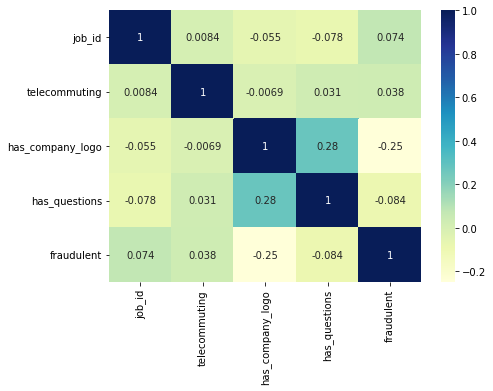

In [17]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_US.corr(),annot=True, cmap="YlGnBu")

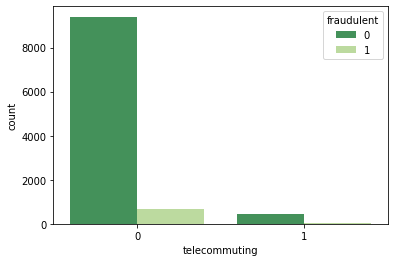

In [18]:
sns.countplot(x ='telecommuting', hue = "fraudulent", data = df_US ,palette="YlGn_r")
plt.show()

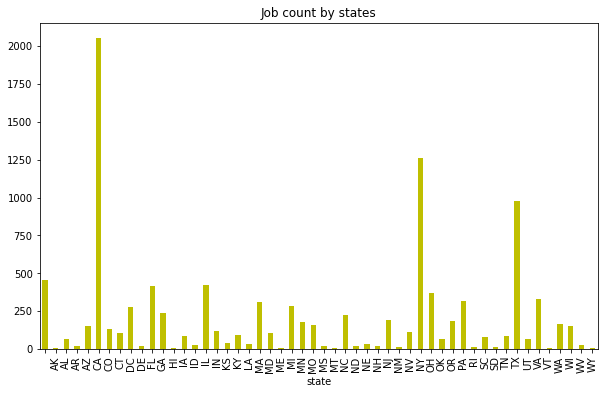

In [19]:
plt.figure(figsize=(10,6))
df_US.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states', color='y');

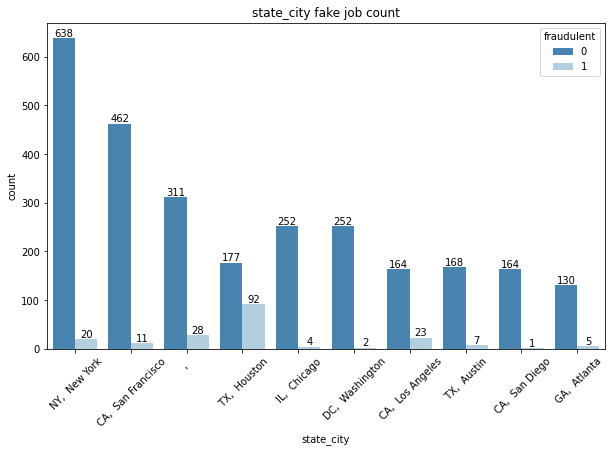

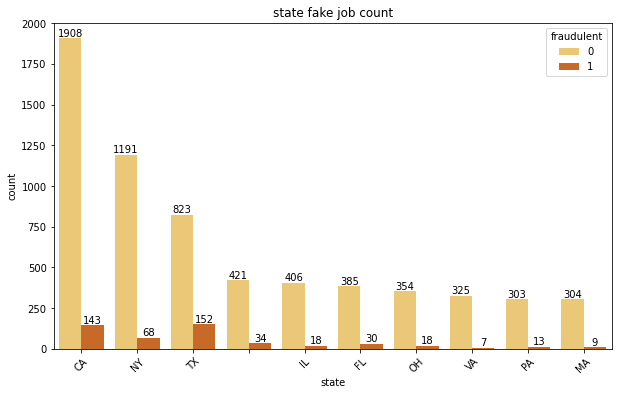

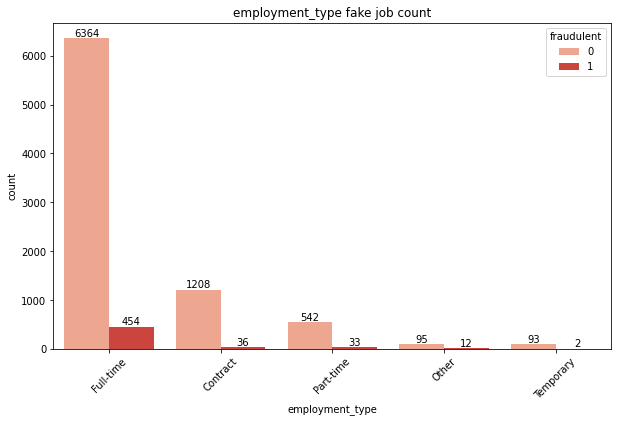

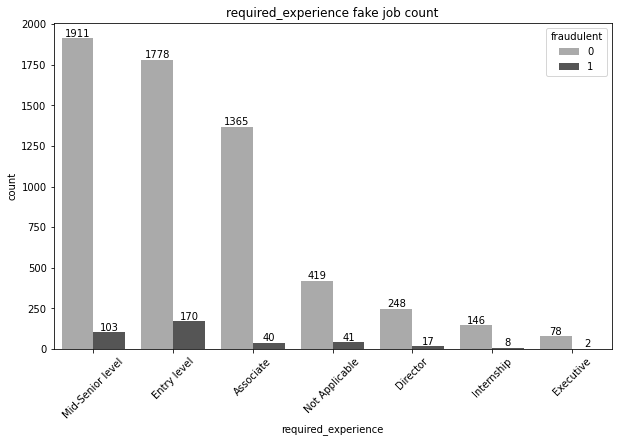

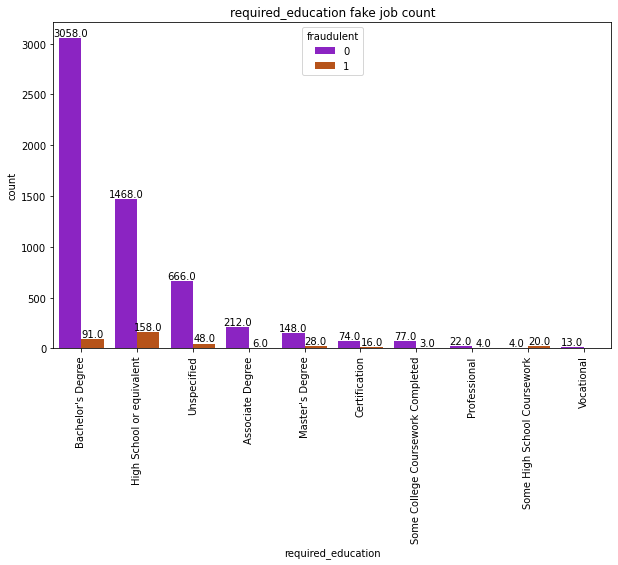

In [20]:
def countplot(feature,color,rotation=45):
    plt.figure(figsize=(10,6))
    ax=sns.countplot(x=feature, data=df_US,order=df_US[feature].value_counts().iloc[:10].index,palette=color,hue="fraudulent")
    for p in ax.patches:
      ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2.0, p.get_height()),ha = 'center', va = 'center', xytext = (0, 5),textcoords = 'offset points')
    plt.xticks(rotation=rotation)
    title = feature + ' fake job count'
    plt.title(title)
    plt.show()

countplot('state_city','Blues_r')

countplot('state','YlOrBr')

countplot('employment_type','Reds')

countplot('required_experience','binary')

countplot('required_education','gnuplot',90)

In [21]:
fraudulent_data=df_US[df_US['fraudulent']==1]

In [22]:
def word_cloud(feature,color):
  plt.figure(figsize=(20,5))
  text = " ".join(feature for feature in fraudulent_data[feature])
  stopwords=set(STOPWORDS)
  wordcloud = WordCloud(background_color="black",width=1600, height=800,stopwords=stopwords,colormap=color).generate(text)
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.axis("off")
  plt.show()

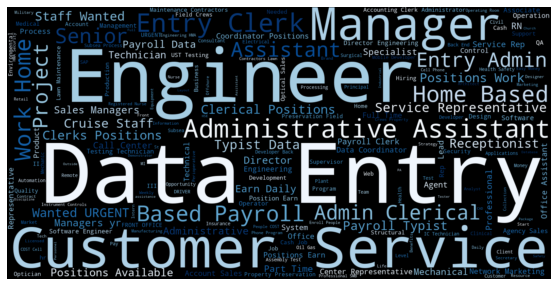

In [23]:
word_cloud('title','Blues_r')

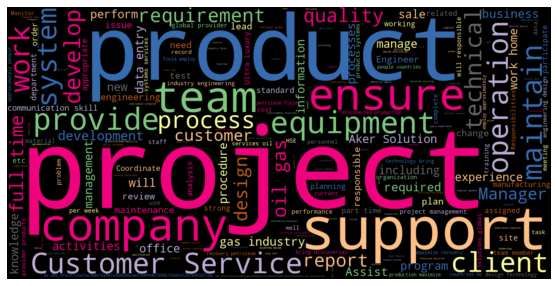

In [24]:
word_cloud('description','Accent')

In [25]:
a=df_US[df_US.fraudulent==0]['employment_type'].value_counts()
b=df_US[df_US.fraudulent==1]['employment_type'].value_counts()


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
labels = ['Full-time', 'Contract', 'Part-time', 'Other', 'Temporary']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=a.values, name="Real"),1, 1)
fig.add_trace(go.Pie(labels=labels, values=b.values, name="Fake"), 1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(title_text="Employment_type vs Fraudulent ",annotations=[dict(text='Real', x=0.18, y=0.5, font_size=20, showarrow=False),dict(text='Fake', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [27]:
a=df_US[df_US.fraudulent==0]['telecommuting'].value_counts()
b=df_US[df_US.fraudulent==1]['telecommuting'].value_counts()

In [28]:
df=pd.DataFrame({'type':['Real','Fake','Real','Fake'],'telicom':['work_from_office','work_from_office','work_from_home','work_from_home'],'count':[a[0],b[0],a[1],b[1]]})

In [29]:
import plotly.express as px
fig = px.scatter(df, y="type", x="count",color="telicom", symbol="telicom")
fig.update_traces(marker_size=10)
fig.show()

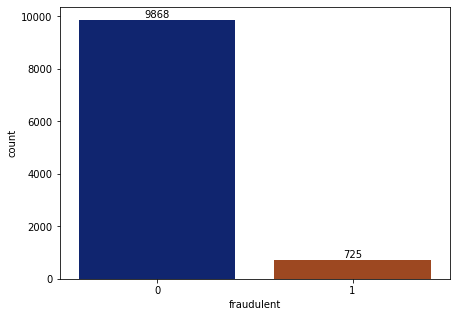

In [30]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='fraudulent', data=df_US,palette="dark");
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2.0, p.get_height()),ha = 'center', va = 'center', xytext = (0, 5),textcoords = 'offset points')

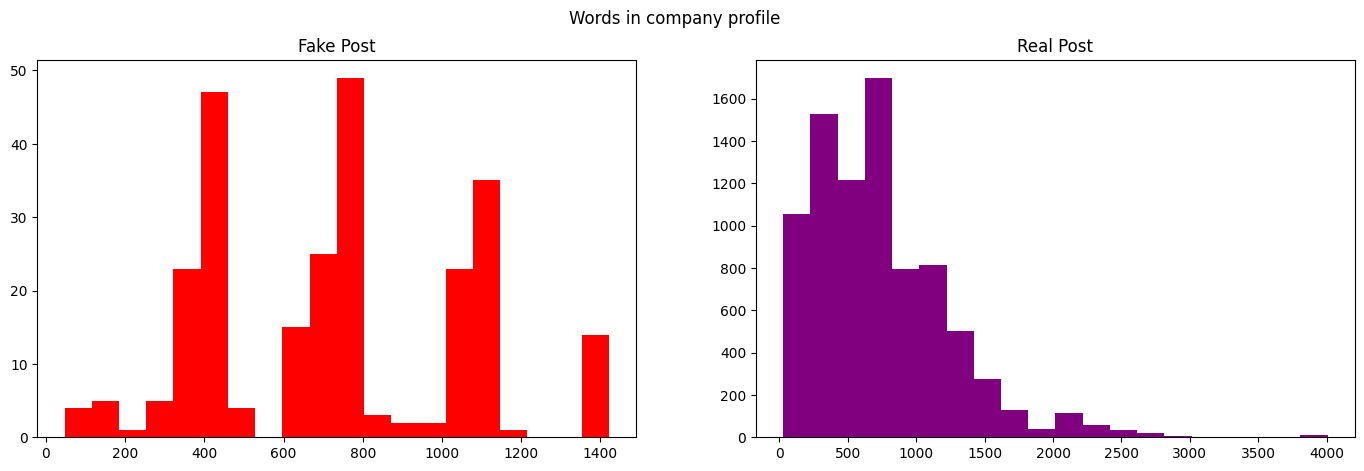

In [31]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=df_US[df_US["fraudulent"]==1]['company_profile'].str.len()
ax1.hist(num,bins = 20,color='r')
ax1.set_title('Fake Post')
num=df_US[df_US["fraudulent"]==0]['company_profile'].str.len()
ax2.hist(num, bins = 20,color='purple')
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

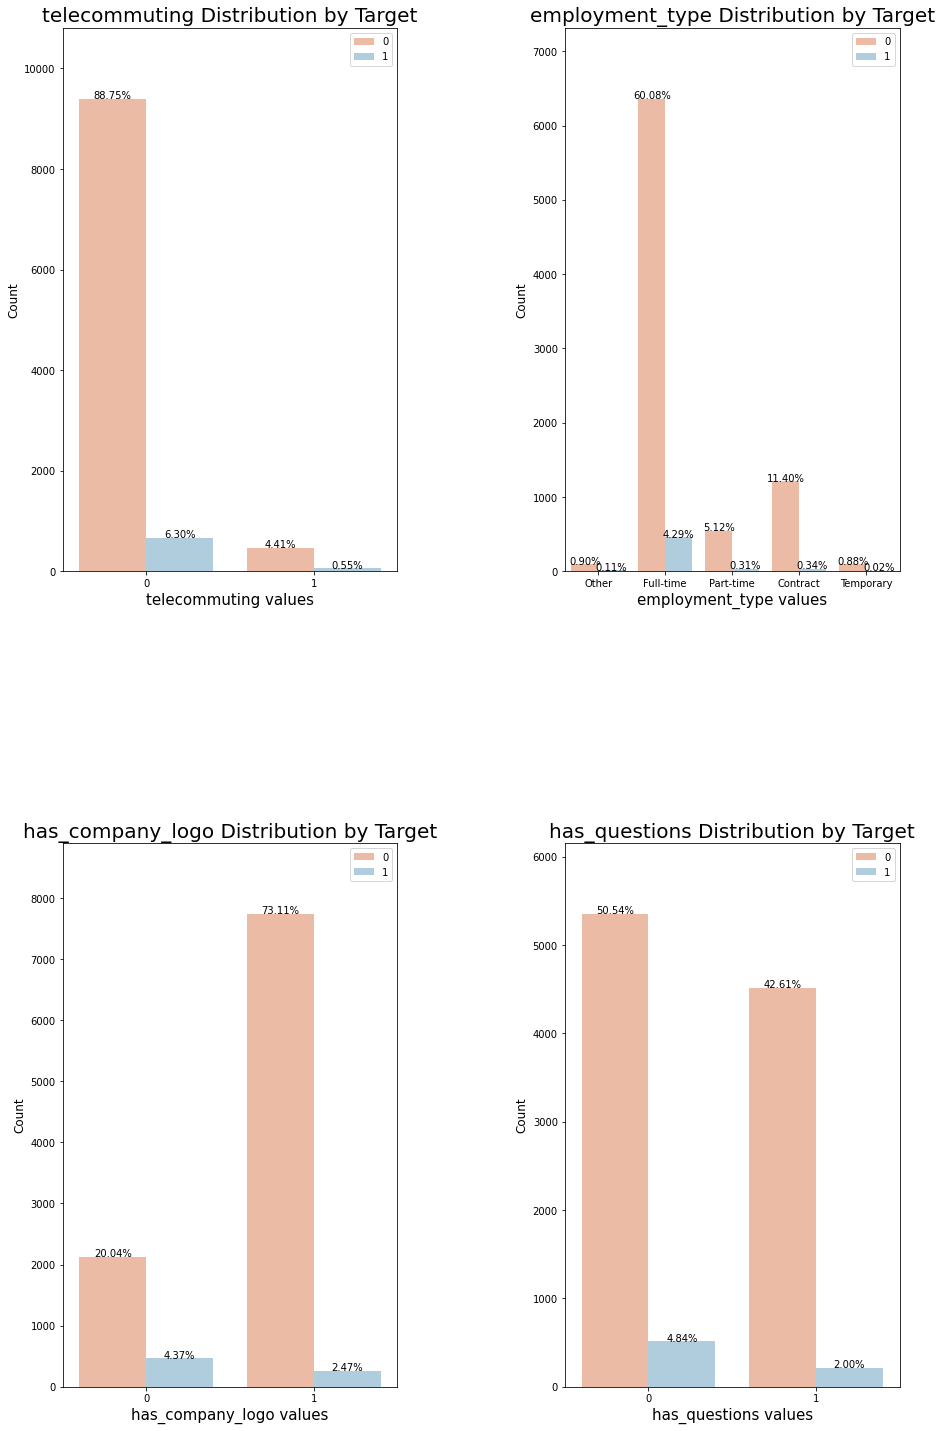

In [32]:
# visualizating catagorical variable by target
cat_cols = ["telecommuting",  "employment_type", "has_company_logo", "has_questions"]
grid = gridspec.GridSpec(2, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(15,25)) 
for n, col in enumerate(df_US[cat_cols]): 
    ax = plt.subplot(grid[n])
    sns.countplot(x=col, data=df_US, hue='fraudulent', palette='RdBu') 
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title('{} Distribution by Target'.format(col), fontsize=20) 
    ax.set_xlabel('{} values'.format(col), fontsize=15)
    plt.legend(fontsize=10)
    total = len(df_US)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) 


plt.show()

In [33]:
df_US.fillna(" ",inplace = True)
df_US['text'] =  df_US['title'] + ' ' + df_US['location'] + ' ' + df_US['company_profile'] + ' ' + df_US['description'] + ' ' + df_US['requirements'] + ' ' + df_US['benefits'] + ' ' + df_US['required_experience'] + ' ' + df_US['required_education'] + ' ' + df_US['industry'] + ' ' + df_US['function']
df_US.drop(['job_id',  'title','location','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function', 'city', 'state_city', 'has_company_logo', 'has_questions', 'state'], axis = 1, inplace = True)

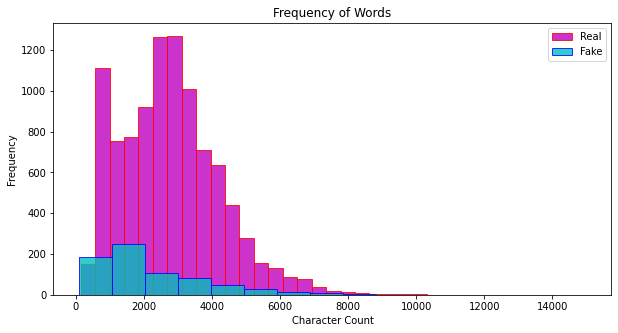

In [34]:
plt.figure(figsize=(10,5))
df_US['character_count'] = df_US.text.apply(len)
df_US[df_US.fraudulent==0].character_count.plot(bins=35, kind='hist', color='m', label='Real', alpha=0.8,edgecolor='red')
df_US[df_US.fraudulent==1].character_count.plot(kind='hist', color='c',  label='Fake', alpha=0.8,edgecolor='blue')
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

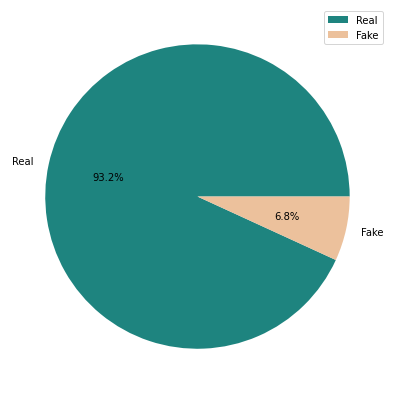

In [35]:
y = np.array([9868, 725])
mylabels = ["Real", "Fake"]
fig = plt.figure(figsize =(10, 7))
mycolors = ["#1e847f","#ecc19c" ]
plt.pie(y, labels = mylabels,autopct='%1.1f%%',colors = mycolors)
plt.legend()
plt.show()

#Data Preprocessing

In [36]:
import re

In [37]:
lemmatizer = WordNetLemmatizer()
def text_cleaning(text):
    text = re.sub("[^a-zA-Z]", " ", text) # removing punctuation
    text = text.lower() # text to lowercase
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    return ' '.join(text) 

In [38]:
df_US['text'] = df_US['text'].apply(text_cleaning)

In [39]:
df_US['character_count'] = df_US.text.apply(len)

In [40]:
df_US

,telecommuting,fraudulent,text,character_count
0,0,0,marketing intern u ny new york food created gr...,2031
1,0,0,commissioning machinery assistant cma u ia wev...,1991
2,0,0,account executive washington dc u dc washingto...,4464
3,0,0,bill review manager u fl fort worth spotsource...,3298
4,0,0,accounting clerk u md job overviewapex environ...,2657
...,...,...,...,...
10651,0,0,product manager u ca san francisco flite deliv...,2156
10652,0,0,recruiting coordinator u nc charlotte responsi...,1726
10653,0,0,javascript developer u sr javascript developer...,466
10654,0,0,payroll accountant u pa philadelphia weblinc e...,3615


In [41]:
X = df_US[['text']]
y = df_US['fraudulent']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)

In [43]:
count_vectorizer = CountVectorizer(stop_words='english')
X_train = count_vectorizer.fit_transform(X_train.text.values)
X_test = count_vectorizer.transform(X_test.text.values)

In [44]:
nb= MultinomialNB()
nb.fit(X_train, y_train)
pred = nb.predict(X_test)
mt.accuracy_score(y_test, pred)

0.9671052631578947

In [45]:
mean_squared_error(y_test,pred)

0.03289473684210526

In [46]:
nn = MLPClassifier(alpha=0.002,solver='lbfgs',random_state=1,learning_rate_init=0.25)
nn.fit(X_train, y_train)
pred = nn.predict(X_test)
mt.accuracy_score(y_test, pred)

0.9733981693363845

In [47]:
mean_squared_error(y_test,pred)

0.02660183066361556

In [48]:
svm = SVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
mt.accuracy_score(y_test, pred)

0.9693935926773455

In [49]:
mean_squared_error(y_test,pred)

0.03060640732265446

In [50]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
mt.accuracy_score(y_test, pred)

0.9493707093821511

In [51]:
mean_squared_error(y_test,pred)

0.05062929061784897

In [52]:
lr = LogisticRegression(tol=0.002)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mt.accuracy_score(y_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9791189931350115

In [53]:
mean_squared_error(y_test,pred)

0.020881006864988557

In [54]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
mt.accuracy_score(y_test, pred)

0.9788329519450801

In [55]:
mean_squared_error(y_test,pred)

0.02116704805491991

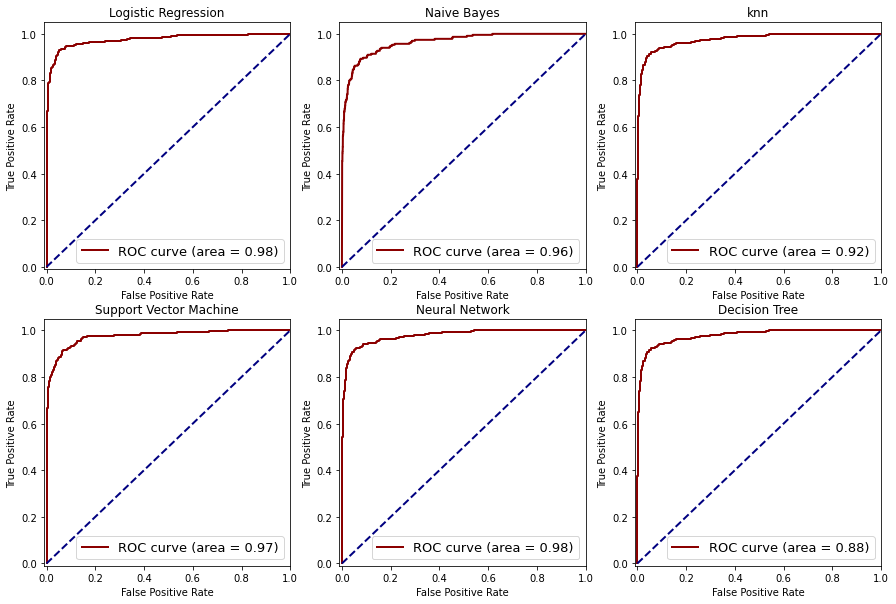

In [56]:
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(X_test)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test.values,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

pred_neigh = neigh.predict_proba(X_test)[:,1]
fpr_neigh,tpr_neigh,_ = roc_curve(y_test.values,pred_neigh)
roc_auc_neigh = auc(fpr_neigh,tpr_neigh)

pred_dt = dt.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test.values,pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

f, axes = plt.subplots(2, 3,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13);

axes[0,2].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_neigh))
axes[0,2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,2].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,2].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'knn')
axes[0,2].legend(loc='lower right', fontsize=13);

axes[1,2].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_dt))
axes[1,2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,2].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,2].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Decision Tree')
axes[1,2].legend(loc='lower right', fontsize=13);

Text(570.5454545454544, 0.5, 'Actual Value')

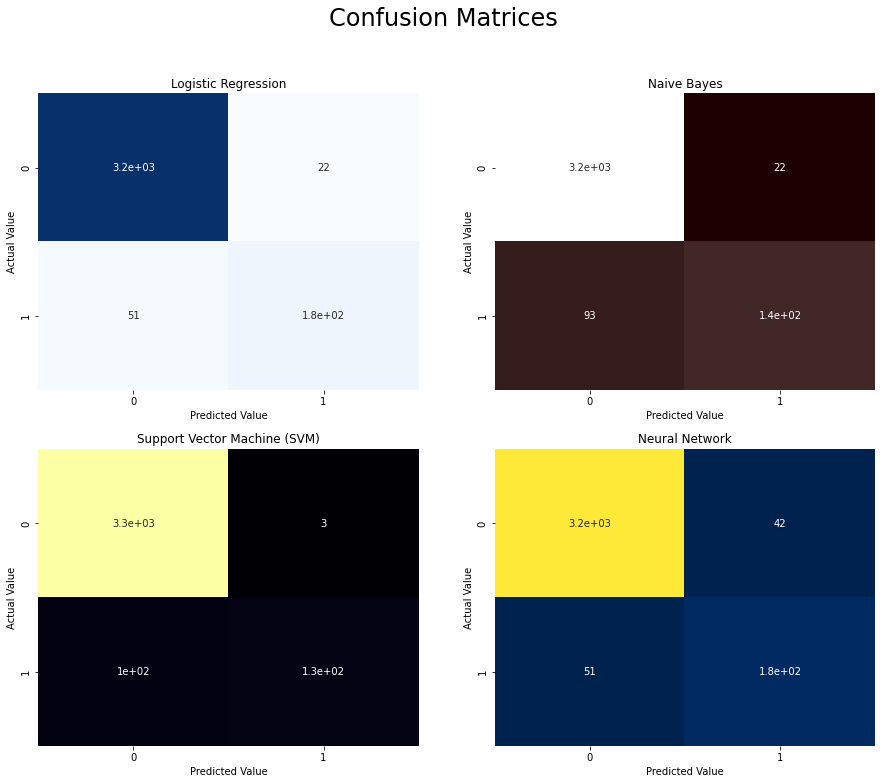

In [57]:
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values,nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))
knn_cm=confusion_matrix(y_test.values, neigh.predict(X_test))
dt_cm=confusion_matrix(y_test.values, dt.predict(X_test))
plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Blues",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="pink",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="inferno",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="cividis",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

Text(570.5454545454544, 0.5, 'Actual Value')

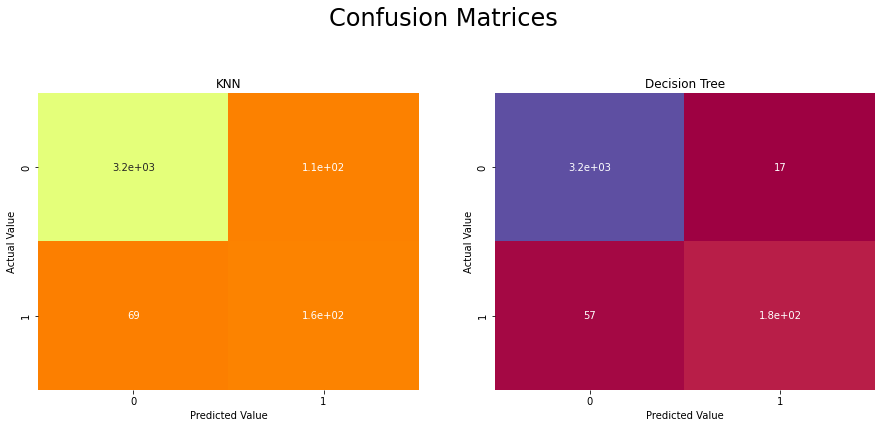

In [58]:
plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplot(2,2,1)
plt.title("KNN")
sns.heatmap(knn_cm, annot = True, cmap="Wistia_r",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

plt.subplot(2,2,2)
plt.title("Decision Tree")
sns.heatmap(dt_cm, annot = True, cmap="Spectral",cbar=False);
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [59]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n Neural Network")
print(mt.classification_report(y_test, nn.predict(X_test)))
print("\n KNN")
print(mt.classification_report(y_test, neigh.predict(X_test)))
print("\n Decision Tree")
print(mt.classification_report(y_test, dt.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3262
           1       0.89      0.78      0.83       234

    accuracy                           0.98      3496
   macro avg       0.94      0.89      0.91      3496
weighted avg       0.98      0.98      0.98      3496


 Naive Bayes
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3262
           1       0.87      0.60      0.71       234

    accuracy                           0.97      3496
   macro avg       0.92      0.80      0.85      3496
weighted avg       0.96      0.97      0.96      3496


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3262
           1       0.98      0.56      0.71       234

    accuracy                           0.97      3496
   macro avg       0.97      0.78      0.85      3496
weighted 

In [60]:
pip install chart-studio

     |████████████████████████████████| 64 kB 2.4 MB/s 


In [61]:
from chart_studio import plotly as py

In [64]:
from plotly.graph_objs import *
Accuracy = {
  "name": "Accuracy", 
  "type": "bar", 
  "x": ["Logistic Regression", "Naive Bayes", "SVM", "Neural Network", "KNN","Decision Tree"], 
  "y": [0.98, 0.97 , 0.97, 0.97, 0.95,0.98]
}
Precision = {
  "name": "Precision", 
  "type": "bar", 
  "x": ["Logistic Regression", "Naive Bayes", "SVM", "Neural Network", "KNN","Decision Tree"],
  "y": [0.89  , 0.87 , 0.98, 0.81 , 0.60 ,0.88  ]
}
Recall = {
  "name": "Recall", 
  "type": "bar", 
  "x": ["Logistic Regression", "Naive Bayes", "SVM", "Neural Network", "KNN","Decision Tree"],
  "y": [0.78, 0.60, 0.56 , 0.78,0.71,0.75]
}
F1_Score = {
  "name": "F1 Score", 
  "type": "bar", 
  "x": ["Logistic Regression", "Naive Bayes", "SVM", "Neural Network", "KNN","Decision Tree"],
  "y": [0.83,  0.71  , 0.71, 0.80, 0.65,0.81]
}
data = Data([Accuracy, Precision, Recall, F1_Score])
layout = {"barmode": "group"}
fig = Figure(data=data, layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




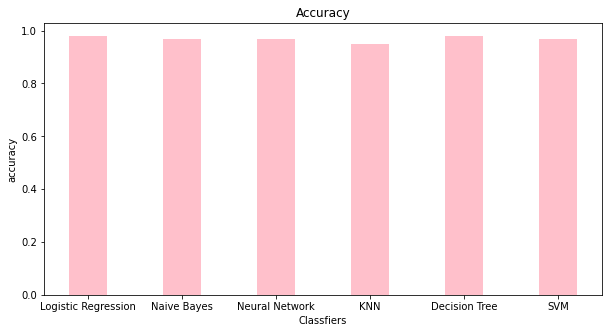

In [73]:
data = {'Logistic Regression':0.98, 'Naive Bayes':0.97, 
        'Neural Network': 0.97,'KNN':0.95,'Decision Tree':0.98,'SVM': 0.97}
classifiers = list(data.keys())
accuracy= list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, accuracy, color ='pink',
        width = 0.4)
 
plt.xlabel("Classfiers")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.show()

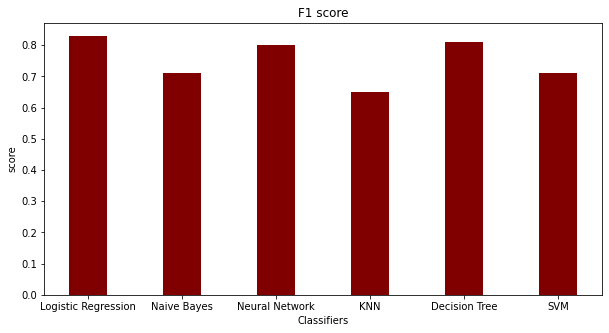

In [65]:
data = {'Logistic Regression':0.83, 'Naive Bayes':0.71, 
        'Neural Network': 0.8,'KNN':0.65,'Decision Tree':0.81,'SVM': 0.71 }
classifiers = list(data.keys())
accuracy= list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("score")
plt.title("F1 score")
plt.show()

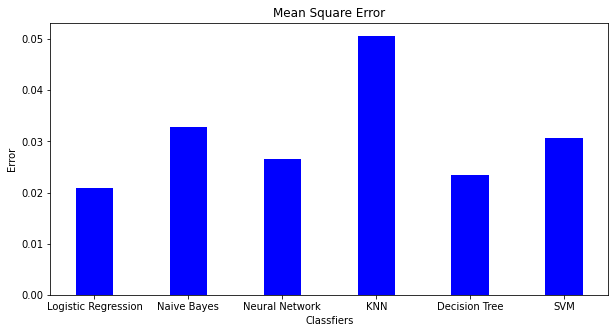

In [68]:
data = {'Logistic Regression':0.020881006864988557, 'Naive Bayes':0.03289473684210526, 
        'Neural Network': 0.02660183066361556,'KNN':0.05062929061784897,'Decision Tree':0.02345537757437071,'SVM': 0.03060640732265446 }
classifiers = list(data.keys())
accuracy= list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, accuracy, color ='blue',
        width = 0.4)
 
plt.xlabel("Classfiers")
plt.ylabel("Error")
plt.title("Mean Square Error")
plt.show()